# GRIP TASK 2 : To Explore Supervised Machine Learning(Linear Regression)

# BY Vrushali Mahadik 

# Problem : To Predict the percentage of a student based on his/her hours of study.

# Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing Dataset

In [2]:
url  = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url,error_bad_lines=False)
print('Data imported succesfuly')
data

Data imported succesfuly


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Checking the Dimensions of the DataFrame 

In [4]:
data.shape

(25, 2)

In [5]:
data.size

50

# Checking the DataTypes of the DataFrame 

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# For Summarizing the DataFrame 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# For checking the Summary Statistics 

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# For Checking the Missing values 

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# In our datset,No Missing values.

# Plotting the distribution of scores

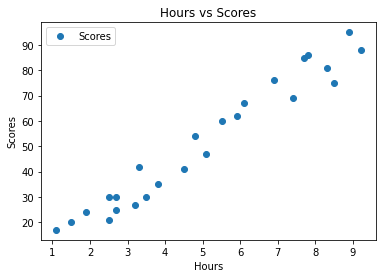

In [10]:
data.plot(x ='Hours',y ='Scores',style ='o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

# From the above graph,we observe that as Hours increases Scores also increases i.e Here is positive relationship between hours studied and the scores obtained.

# Preparing the data 

In [11]:
x  =data.iloc[:,:-1].values
print(x)
x.shape

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


(25, 1)

In [12]:
y  =data.iloc[:,-1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Training the Simple Linear Regression model on the Training set 

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

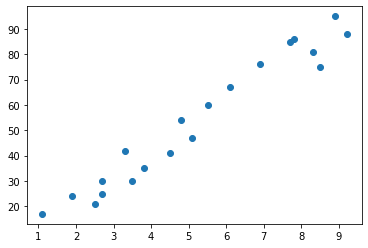

In [16]:
plt.scatter(X_train,y_train)
plt.show()

# Predicting the Test set results 

In [17]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Visualising the Training set results 

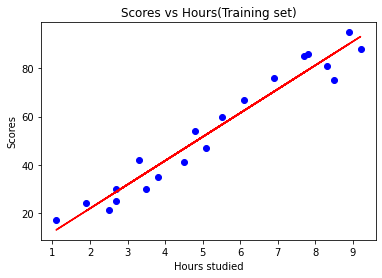

In [18]:
plt.scatter(X_train,y_train,color = 'b')
plt.plot(X_train,regressor.predict(X_train),color = 'r')
plt.title('Scores vs Hours(Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

# Visualising the Test set results 

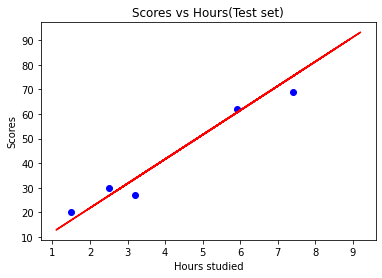

In [19]:
plt.scatter(X_test,y_test,color ='b')
plt.plot(X_train,regressor.predict(X_train),color ='r')
plt.title('Scores vs Hours(Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

# Comparing Actual vs Predicted 

In [20]:
data1 = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


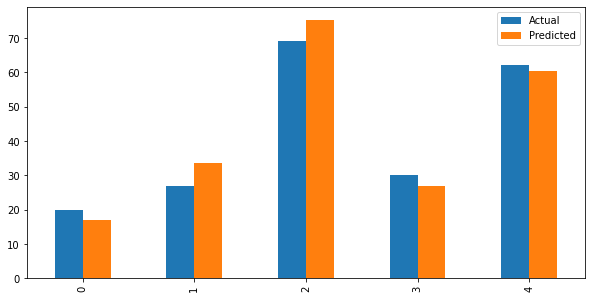

In [21]:
data1.plot(kind ='bar',figsize=(10,5))
plt.show()

# Plotting the Regression Line 

In [22]:
print(regressor.intercept_)

2.018160041434683


In [23]:
print(regressor.coef_)

[9.91065648]


In [24]:
reg_line = regressor.coef_*x+regressor.intercept_

# Therefore, the equation of our simple linear regression model is 

# Scores  = 9.9106564*Hours studied+2.018160041434683

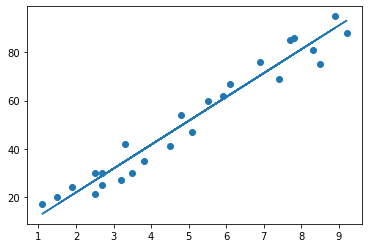

In [25]:
plt.scatter(x,y)
plt.plot(x,reg_line)
plt.show()

# Prdecting Custom Data 

In [26]:
prediction_score = regressor.predict([[9.25]])
print('Predicted Score of a student studying 9.25 hours:',prediction_score)

Predicted Score of a student studying 9.25 hours: [93.69173249]


# According to the model,if a student studies for 9.25 hours he/she would obtain a score of 93.69173249

# Evaluating Model Performance 

In [27]:
import sklearn.metrics as metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Thank You :)